In [1]:
import polars as pl
from polars import col
from lightkurve import search_lightcurve
import matplotlib.pyplot as plt

%matplotlib inline


/home/charlie/Documents/github/exoplanet-hunting-ml/.venv/lib64/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [2]:
kepler_planets = pl.scan_csv("kepler-data/kepler-planets.csv")
kepler_planets.collect()

pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,…,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
str,str,i64,i64,i64,str,i64,str,str,i64,str,f64,f64,f64,i64,f64,f64,f64,i64,f64,f64,f64,i64,f64,f64,f64,i64,f64,f64,f64,i64,f64,f64,f64,i64,str,f64,…,f64,f64,f64,i64,f64,f64,f64,i64,f64,f64,f64,i64,str,f64,f64,f64,i64,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str
"""KIC 10525077 b""","""KIC 10525077""",1,1,1,"""Transit""",2015,"""Kepler""","""Published Confirmed""",0,"""<a refstr=WANG_ET_AL__2015 hre…",854.083,0.01628,-0.01697,0,null,null,null,null,5.5,0.9,-0.8,0,0.490677,0.080293,-0.071371,0,null,null,null,null,null,null,null,null,null,null,…,1.01,0.1,-0.1,0,1.01,0.12,-0.12,0,-0.04,0.22,-0.3,0,"""[Fe/H]""",4.42,0.06,-0.3,0,"""<a refstr=STASSUN_ET_AL__2019 …","""19h09m30.75s""",287.378116,"""+47d46m16.15s""",47.771154,1461.15,56.0,-52.1,15.592,0.115,-0.115,13.754,0.046,-0.046,15.3043,0.000404,-0.000404,"""2015-12-24""","""2015-12""","""2016-01-05"""
"""KIC 3558849 b""","""KIC 3558849""",1,1,1,"""Transit""",2015,"""Kepler""","""Published Confirmed""",0,"""<a refstr=WANG_ET_AL__2015 hre…",1322.3,386.1,-11.2,0,null,null,null,null,6.9,1.0,-0.9,0,0.615577,0.089214,-0.080293,0,null,null,null,null,null,null,null,null,null,null,…,1.01,0.11,-0.11,0,0.98,0.11,-0.11,0,-0.42,0.28,-0.3,0,"""[Fe/H]""",4.44,0.07,-0.27,0,"""<a refstr=STASSUN_ET_AL__2019 …","""19h39m47.96s""",294.949838,"""+38d36m18.67s""",38.605187,1215.7,34.2,-32.41,14.32,0.114,-0.114,12.767,0.027,-0.027,14.1674,0.000258,-0.000258,"""2015-12-24""","""2015-12""","""2016-01-05"""
"""KIC 5437945 b""","""KIC 5437945""",1,1,2,"""Transit""",2015,"""Kepler""","""Published Confirmed""",0,"""<a refstr=WANG_ET_AL__2015 hre…",440.7813,0.00563,-0.00577,0,null,null,null,null,6.4,1.6,-1.6,0,0.57097,0.142742,-0.142742,0,null,null,null,null,null,null,null,null,null,null,…,1.24,0.29,-0.29,0,1.07,0.17,-0.17,0,-0.38,0.28,-0.3,0,"""[Fe/H]""",4.16,0.22,-0.25,0,"""<a refstr=STASSUN_ET_AL__2019 …","""19h13m53.98s""",288.474903,"""+40d39m04.63s""",40.651285,1274.01,27.92,-27.92,13.834,0.114,-0.114,12.367,0.027,-0.027,13.7506,0.00029,-0.00029,"""2015-12-24""","""2015-12""","""2016-01-05"""
"""KIC 8540376 b""","""KOI-7892""",1,1,3,"""Transit""",2015,"""Kepler""","""Published Confirmed""",0,"""<a refstr=WANG_ET_AL__2015 hre…",31.8099,0.00919,-0.00933,0,null,null,null,null,4.1,2.2,-1.9,0,0.3657775,0.196271,-0.169507,0,null,null,null,null,null,null,null,null,null,null,…,1.26,0.56,-0.56,0,1.04,0.2,-0.2,0,-0.16,0.23,-0.32,0,"""[Fe/H]""",4.31,0.1,-0.33,0,"""<a refstr=STASSUN_ET_AL__2019 …","""18h49m30.61s""",282.37754,"""+44d41m40.45s""",44.694569,1072.3,22.025,-22.025,14.411,0.114,-0.114,12.966,0.023,-0.023,14.2165,0.000257,-0.000257,"""2015-12-24""","""2015-12""","""2016-01-05"""
"""KIC 8540376 c""","""KOI-7892""",1,1,3,"""Transit""",2015,"""Kepler""","""Published Confirmed""",0,"""<a refstr=WANG_ET_AL__2015 hre…",75.2,38.9,-1.1,0,null,null,null,null,2.4,1.9,-1.4,0,0.214114,0.169507,-0.1249,0,null,null,null,null,null,null,null,null,null,null,…,1.26,0.56,-0.56,0,1.04,0.2,-0.2,0,-0.16,0.23,-0.32,0,"""[Fe/H]""",4.31,0.1,-0.33,0,"""<a refstr=STASSUN_ET_AL__2019 …","""18h49m30.61s""",282.37754,"""+44d41m40.45s""",44.694569,1072.3,22.025,-22.025,14.411,0.114,-0.114,12.966,0

In [3]:
kois = pl.scan_csv("kepler-data/cumulative_2025.07.20_19.49.20.csv")
kois.collect()

kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
i64,str,str,str,str,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
10797460,"""K00752.01""","""Kepler-227 b""","""CONFIRMED""","""CANDIDATE""",1.0,0,0,0,0,9.488036,0.000028,-0.000028,170.53875,0.00216,-0.00216,0.146,0.318,-0.146,2.9575,0.0819,-0.0819,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,null,null,93.59,29.45,-16.65,35.8,1,"""q1_q17_dr25_tce""",5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
10797460,"""K00752.02""","""Kepler-227 c""","""CONFIRMED""","""CANDIDATE""",0.969,0,0,0,0,54.418383,0.0002479,-0.000248,162.51384,0.00352,-0.00352,0.586,0.059,-0.443,4.507,0.116,-0.116,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,null,null,9.11,2.87,-1.62,25.8,2,"""q1_q17_dr25_tce""",5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
10811496,"""K00753.01""",null,"""CANDIDATE""","""CANDIDATE""",0.0,0,0,0,0,19.89914,0.000015,-0.000015,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.7822,0.0341,-0.0341,10829.0,171.0,-171.0,14.6,3.92,-1.31,638.0,null,null,39.3,31.04,-10.49,76.3,1,"""q1_q17_dr25_tce""",5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
10848459,"""K00754.01""",null,"""FALSE POSITIVE""","""FALSE POSITIVE""",0.0,0,1,0,0,1.736952,2.6300e-7,-2.6300e-7,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.5,-2.83,1395.0,null,null,891.96,668.95,-230.35,505.6,1,"""q1_q17_dr25_tce""",5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.28521,15.597
10854555,"""K00755.01""","""Kepler-664 b""","""CONFIRMED""","""CANDIDATE""",1.0,0,0,0,0,2.525592,0.000004,-0.000004,171.59555,0.00113,-0.00113,0.701,0.235,-0.478,1.6545,0.042,-0.042,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,null,null,926.16,874.33,-314.24,40.9,1,"""q1_q17_dr25_tce""",6031.0,169.0,-211.0,4.438,0.07,-0.21,1.046,0.334,-0.133,288.75488,48.2262,15.509
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
10090151,"""K07985.01""",null,"""FALSE POSITIVE""","""FALSE POSITIVE""",0.0,0,1,1,0,0.527699,1.1600e-7,-1.1600e-7,131.705093,0.00017,-0.00017,1.252,0.051,-0.049,3.2221,0.0174,-0.0174,1579.2,4.6,-4.6,29.35,7.7,-2.57,2088.0,null,null,4500.53,3406.38,-1175.26,453.3,1,"""q1_q17_dr25_tce""",5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
10128825,"""K07986.01""",null,"""CANDIDATE""","""CANDIDATE""",0.497,0,0,0,0,1.739849,0.0000178,-0.000018,133.00127,0.00769,-0.00769,0.043,0.423,-0.043,3.114,0.229,-0.229,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,null,null,1585.81,1537.86,-502.22,10.6,1,"""q1_q17_dr25_tce""",6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
10147276,"""K07987.01""",null,"""FALSE POSITIVE""","""FALSE POSITIVE""",0.021,0,0,1,0,0.681402,0.000002,-0.000002,132.18175,0.00285,-0.00285,0.147,0.309,-0.147,0.865,0.162,-0.162,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,null,null,5713.41,5675.74,-1836.94,12.3,1,"""q1_q17_dr25_tce""",6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [4]:
tces = pl.scan_csv("kepler-data/q1_q17_dr25_tce_2025.07.20_08.02.09.csv")
tces.collect()

kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err
i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2304168,2,0,431.719,0.0118025,219.298,0.0183838,0.9308,0.03871,13.22,1.144,488.4,53.7,10.32,8.768,4.568,494.0,104.0,14.09,11.85,7221.0,327.0,3.67,0.49,3.332,1.718
2304235,1,0,0.570607,0.000006,132.049,0.000699,0.9,0.2687,1.16,0.1159,75.15,5.45,20.39,27.83,20.18,0.0,-1.0,0.0,-1.0,4896.0,172.0,2.12,0.56,26.32,17.39
2304566,1,0,0.68948,0.000048,131.833,0.0198384,0.3085,45.49,5.236,0.7365,3.794,1.923,2.574,1.168,3.268,0.0,-1.0,0.0,-1.0,7059.0,269.0,3.29,0.43,5.894,2.825
2304320,1,0,16.5408,0.000043,133.952,0.002193,0.8848,0.2235,2.715,0.3863,366.7,12.29,30.83,1.763,0.414,570.0,16.6,24.93,2.91,5064.0,101.0,4.57,0.05,0.769,0.049
2303365,2,0,0.520697,0.000009,132.003,0.000916,0.9008,0.4155,1.035,0.2327,123.6,13.35,18.95,4.686,2.725,0.0,-1.0,0.0,-1.0,7517.0,339.0,3.64,0.46,3.603,1.762
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
11912947,6,0,522.609,-1.0,501.352,-1.0,0.1,-1.0,3.5,-1.0,2256.0,-1.0,-1.0,1.511,-1.0,92.3,-1.0,0.02,-1.0,3440.0,44.0,4.93,0.04,0.321,0.033
11922283,3,1,256.782,0.0115732,224.233,0.0370797,0.9854,0.06395,10.16,1.509,514.7,146.8,6.628,37.8,42.08,956.0,130.0,197.89,107.61,7120.0,274.0,2.89,0.3,11.11,4.219
11922283,4,0,0.878715,0.000013,132.314,0.007274,1.0,0.1583,8.534,10.41,111.1,1567.0,11.71,23.35,29.37,0.0,-1.0,0.0,-1.0,7120.0,274.0,2.89,0.3,11.11,4.219


In [5]:
(tces
    .filter((col("kepid") == 10666592) & (col("tce_plnt_num") == 1))
    .collect()
)

kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err
i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
10666592,1,0,2.20473,4.7021e-8,132.383,0.000011,0.6221,0.002058,4.044,0.002017,6676.0,2.167,3565.0,16.78,0.9457,2050.0,42.9,4165.02,349.3,6440.0,89.0,4.02,0.03,1.952,0.11


In [6]:
lc = search_lightcurve("KIC10666592")
lc[:5]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 03,2009,Kepler,60,kplr010666592,0.0
1,Kepler Quarter 00,2009,Kepler,60,kplr010666592,0.0
2,Kepler Quarter 03,2009,Kepler,60,kplr010666592,0.0
3,Kepler Quarter 01,2009,Kepler,60,kplr010666592,0.0
4,Kepler Quarter 02,2009,Kepler,60,kplr010666592,0.0


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

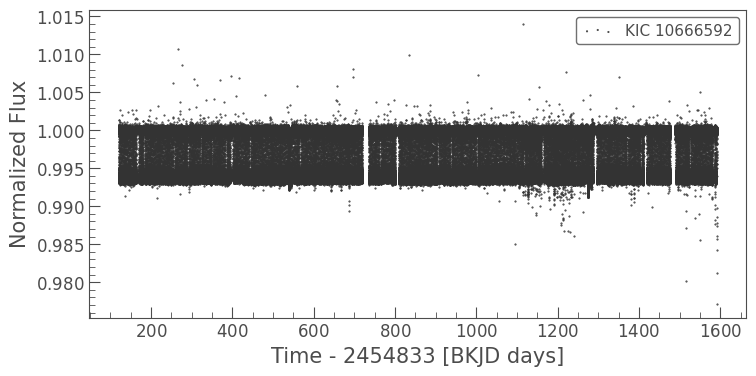

In [7]:
lc = search_lightcurve('Kepler-2 b', exptime=60, author='Kepler').download_all().stitch()
lc.scatter(s=1.0)

In [8]:
tce = tces.filter((col("kepid") == 10666592) & (col("tce_plnt_num") == 1))


transit_epoch = tce.select("tce_time0bk").collect().item()
period = tce.select("tce_period").collect().item()
transit_events = [transit_epoch + (period * i) for i in range(10000)]

In [9]:
flat_lc = lc.remove_outliers(sigma_lower=float("inf"), sigma_upper=5).flatten()

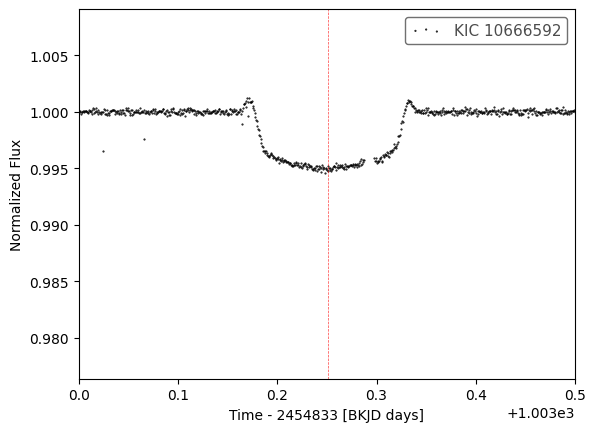

In [10]:
ax = plt.subplot()
flat_lc.scatter(ax=ax, fc="black", s=1.0)
x_min, x_max = 1003, 1003.5
ax.set_xlim(x_min, x_max)
for transit_event_time in transit_events:
    if (transit_event_time <= x_max) & (transit_event_time >= x_min):
        ax.axvline(transit_event_time, color='red', linestyle='--', linewidth=0.5, alpha=0.75)
    if transit_event_time > x_max:
        break

In [11]:
def plot_kepler_lc_transit(kep_id: int, tce_planet_number: int, x_min: float, x_max: float, exp_time=60):
    
    print(f"Searching for light curve for KIC {kep_id}...")
    lc = search_lightcurve(f"KIC{kep_id}", exptime=exp_time, author="Kepler")
    
    print("Downloading light curve...")
    lc = lc.download_all().stitch()
    
    print("Processing light curve...")
    flat_lc = lc.remove_outliers(sigma_lower=5, sigma_upper=5) #.flatten()
    
    print("Getting TCE data...")
    tce = tces.filter((col("kepid") == kep_id) & (col("tce_plnt_num") == tce_planet_number))
    transit_epoch = tce.select("tce_time0bk").collect().item()
    period = tce.select("tce_period").collect().item()
    transit_events = [transit_epoch + (period * i) for i in range(-500,500)]
    
    print("Generating plot...")
    ax = plt.subplot()
    flat_lc.scatter(ax=ax, fc="black", s=1.0)
    ax.set_xlim(x_min, x_max)
    for transit_event_time in transit_events:
        if (transit_event_time <= x_max) & (transit_event_time >= x_min):
            ax.axvline(transit_event_time, color='red', linestyle='--', linewidth=0.5, alpha=0.75)
        if transit_event_time > x_max:
            break

Searching for light curve for KIC 10666592...
Processing light curve...
Getting TCE data...
Generating plot...


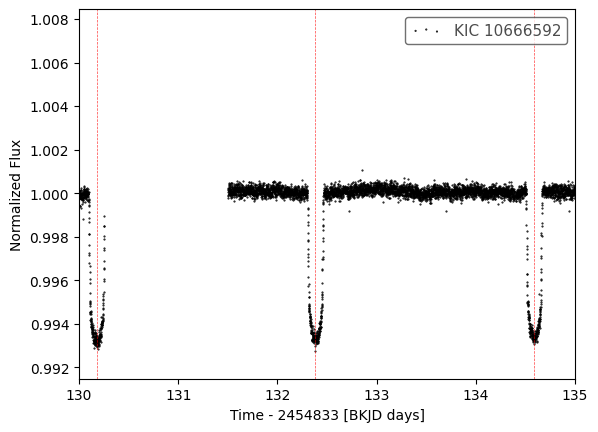

In [12]:
# Kepler-2b aka HAT-P-7b
plot_kepler_lc_transit(kep_id=10666592, tce_planet_number=1, x_min=130, x_max=135)

In [13]:
#          kepler-3, kepler-4, kepler-5, kepler-6
kep_ids = [10748390, 11853905, 8191672,  10874614]
(tces
    .filter((col("kepid").is_in(kep_ids)))
    .collect()
)

kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err
i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
8191672,1,0,3.54846,1.5596e-7,133.547,0.000029,0.007762,1.347,4.561,0.007231,7282.0,3.583,2178.0,14.91,1.316,1640.0,51.3,1714.51,214.6,6290.0,125.0,4.07,0.05,1.746,0.154
10874614,1,0,3.2347,1.0021e-7,134.425,0.000019,0.02118,0.3835,3.591,0.005171,10560.0,4.121,2865.0,13.04,0.9596,1360.0,42.8,799.56,101.0,5640.0,113.0,4.24,0.06,1.291,0.095
10874614,2,0,412.028,0.0142915,436.545,0.0154636,0.8907,0.746,5.418,2.048,170.4,37.21,5.186,2.001,1.455,269.0,8.51,1.25,0.16,5640.0,113.0,4.24,0.06,1.291,0.095
10748390,1,0,4.8878,1.3965e-7,134.589,0.000018,0.502,0.02904,2.406,0.006506,4365.0,2.492,1792.0,5.073,0.1889,800.0,20.0,96.99,9.69,4778.0,95.0,4.59,0.04,0.763,0.028
11853905,1,0,3.21366,9.5147e-7,133.254,0.000186,0.7866,0.04087,4.127,0.04462,726.4,2.506,302.3,4.596,0.3015,1520.0,32.0,1246.6,105.36,5795.0,77.0,4.1,0.03,1.545,0.097


Searching for light curve for KIC 10748390...
Processing light curve...
Getting TCE data...
Generating plot...


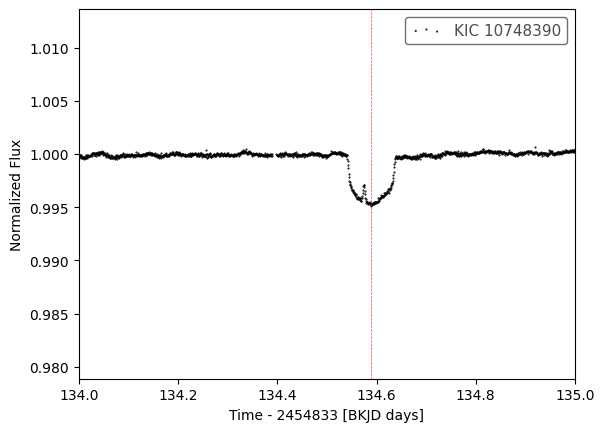

In [14]:
# Kepler-3b aka HAT-P-11b
plot_kepler_lc_transit(kep_id=10748390, tce_planet_number=1, x_min=134, x_max=135)

Searching for light curve for KIC 11853905...
Processing light curve...
Getting TCE data...
Generating plot...


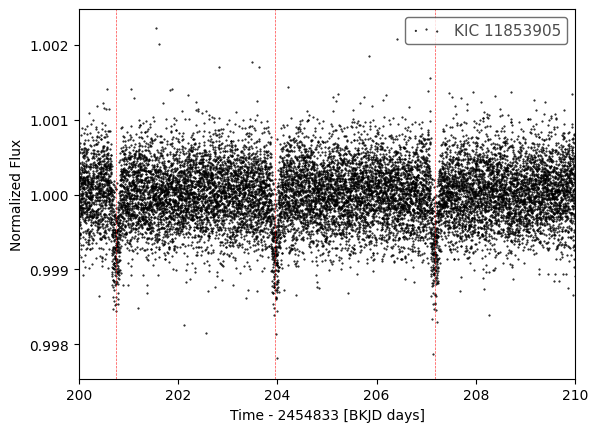

In [15]:
# Kepler-4b
plot_kepler_lc_transit(11853905, 1, 200, 210)

Searching for light curve for KIC 8191672...
Processing light curve...
Getting TCE data...
Generating plot...


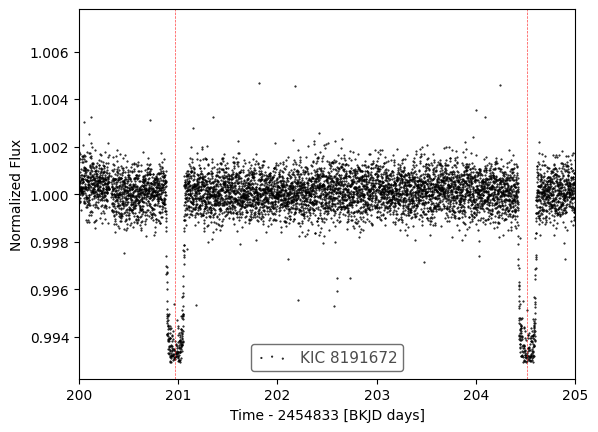

In [16]:
plot_kepler_lc_transit(8191672, 1, 200, 205)

Searching for light curve for KIC 10874614...
Processing light curve...
Getting TCE data...
Generating plot...


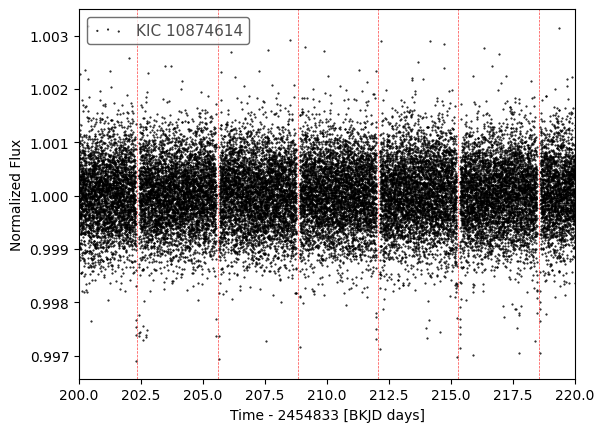

In [17]:
plot_kepler_lc_transit(10874614, 1, 200, 220)